In [ ]:
  %cd /content
!git clone https://github.com/RahilRaj/VoiceCloning.git
%cd /content/VoiceCloning
%tensorflow_version 1.x
!pip install -q -r requirements.txt
!pip install webrtcvad
!apt-get install -qq libportaudio2

/content
Cloning into 'VoiceCloning'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 35 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.
/content/VoiceCloning
TensorFlow 1.x selected.
     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 686kB 39.0MB/s 
     |████████████████████████████████| 10.3MB 33.3MB/s 
     |████████████████████████████████| 14.5MB 293kB/s 
     |████████████████████████████████| 245kB 49.7MB/s 
     |████████████████████████████████| 8.3MB 21.2MB/s 
     |████████████████████████████████| 1.2MB 52.8MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 317kB 27.6MB/s 
     |████████████████████████████████| 59.9MB 64kB/s 
ERROR: lucid 0.3.10 has requirement numpy<=1.19, but you'll have 

In [ ]:
!mv /content/input.wav /content/VoiceCloning

In [ ]:
from encoder.audio import *
from encoder.inference import *

preprocessed_op=preprocess_wav("input.wav")
print(preprocessed_op)

[ 7.3242188e-04  5.7983398e-04  5.4931641e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05]


In [ ]:
from encoder.params_data import *
from encoder.model import SpeakerEncoder
from encoder.audio import preprocess_wav   # We want to expose this function from here
from matplotlib import cm
from encoder import audio
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
encoder_weights = Path("encoder/saved_models/pretrained.pt")
load_model(encoder_weights)

Loaded encoder "pretrained.pt" trained to step 1564501


In [ ]:
embedding_op= embed_utterance(preprocessed_op)
print(embedding_op)

[1.59188379e-02 0.00000000e+00 2.07671344e-01 0.00000000e+00
 0.00000000e+00 2.23063156e-02 2.29958836e-02 4.10170341e-03
 7.17587173e-02 7.82070868e-03 1.03671014e-01 1.10847600e-01
 1.21297240e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.96836025e-01 0.00000000e+00 6.84631523e-04 1.95512250e-02
 1.31592929e-01 2.21978165e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.25702590e-01 0.00000000e+00 1.91229256e-03
 0.00000000e+00 0.00000000e+00 2.92472839e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.37986606e-02 1.08140849e-01
 1.15225632e-02 1.02495896e-02 1.42517788e-02 6.74201921e-03
 0.00000000e+00 0.00000000e+00 9.01677161e-02 2.18647234e-02
 3.37778442e-02 0.00000000e+00 8.11412558e-03 2.63203541e-03
 5.72389252e-02 0.00000000e+00 0.00000000e+00 1.49594501e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.54876414e-02 2.57058088e-02 1.87539812e-02 2.67667472e-02
 0.00000000e+00 0.00000000e+00 1.04609869e-01 8.55171755e-02
 2.69113632e-04 0.000000

     |████████████████████████████████| 13.1MB 255kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


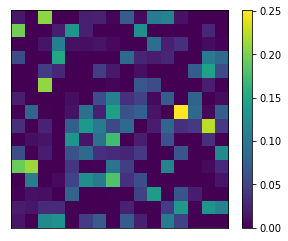

In [ ]:
!pip install matplotlib==3.1.3
plot_embedding_as_heatmap(embedding_op)

     |████████████████████████████████| 13.1MB 320kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2


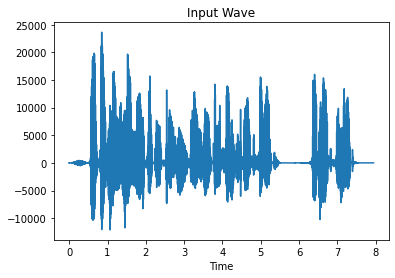

In [ ]:
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt 
import numpy as np 
import wave, sys 
    
raw = wave.open('input.wav') 
      
signal = raw.readframes(-1) 
signal = np.frombuffer(signal, dtype ="int16") 
      
f_rate = raw.getframerate()
  
time = np.linspace( 0, len(signal) / f_rate, num = len(signal)) 
  
plt.figure(1) 
plt.title("Input Wave") 
plt.xlabel("Time") 
plt.plot(time, signal) 
plt.show() 

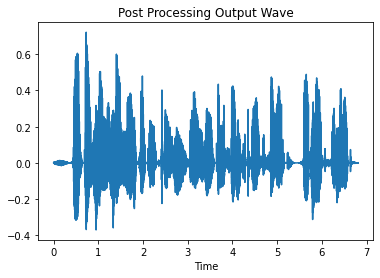

In [ ]:
signal = preprocessed_op

f_rate = 16000
time = np.linspace( 0, len(signal) / f_rate, num = len(signal)) 

plt.figure(1) 
plt.title("Post Processing Output Wave") 
plt.xlabel("Time") 
plt.plot(time, signal) 
plt.show() 

In [ ]:
!mv /content/spectrogram /content/VoiceCloning

In [ ]:
file = open("spectrogram", "rb")
#read the file to numpy array
spec = np.load(file)
#close the file
file.close()
print(spec)

[[-3.8508067 -3.9063222 -3.6888716 ... -1.9161855 -2.0502727 -2.470265 ]
 [-3.832608  -3.9076202 -3.606921  ... -1.7647136 -1.9341413 -2.3479064]
 [-3.8184772 -3.9147453 -3.5327153 ... -1.5852352 -1.7965008 -2.2763984]
 ...
 [-3.8634892 -3.8627453 -3.8197901 ... -3.7448406 -3.8292358 -3.8512416]
 [-3.866501  -3.8601685 -3.8116908 ... -3.785999  -3.8591158 -3.8642638]
 [-3.844506  -3.844963  -3.799806  ... -3.8131258 -3.8817365 -3.8524127]]


16000


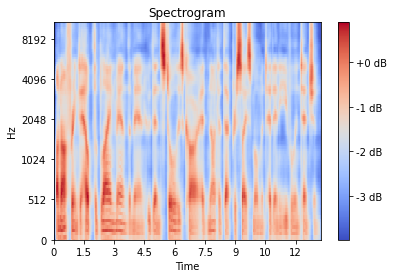

In [ ]:
import librosa
import librosa.display
sr = 16000
print(sr)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

In [ ]:
!mv /content/output.wav /content/VoiceCloning

In [ ]:
!dir

encoder  output.wav  README.md	requirements.txt


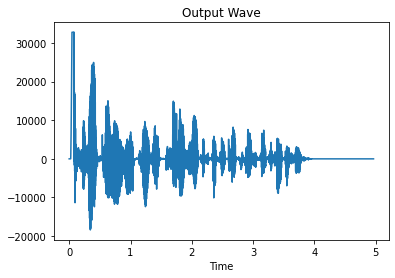

In [ ]:
raw = wave.open('output.wav') 
      
signal = raw.readframes(-1) 
signal = np.frombuffer(signal, dtype ="int16") 

f_rate = raw.getframerate()
time = np.linspace( 0, len(signal) / f_rate, num = len(signal)) 
  
plt.figure(1) 
plt.title("Output Wave") 
plt.xlabel("Time") 
plt.plot(time, signal) 
plt.show() 